# Regression between sea level height and the timmerman wind data regions for observational data

This regression can either be performed using observational or model (cmip6) data.
When observational or cmip6 data is used, functions containing respectively 'obs' or 'cmip6' should be used.


For each sea level datapoint, a wind stress data point located nearest to the sea level point to perform a regression.

In this notebook, functions are used from: 

'/code/import_data.py' 

'/code/regression.py' 

'/code/figures.py' 

In [10]:
%load_ext autoreload
%autoreload 2

from code import import_data as imprt
from code import regression as regres
from code import figures as figs

data_type = 'era5'
model = 'Timmerman'

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


#### Import and plot tide gauge data

In [11]:
# Open data file
tg_data = imprt.import_obs_slh_data()

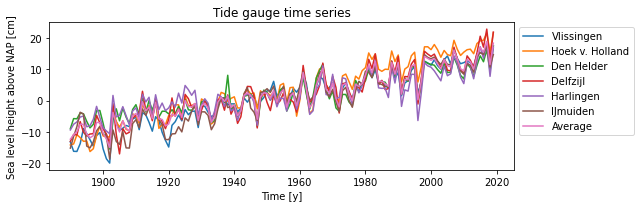

In [12]:
figs.plot_tg_data(tg_data)

#### Import and plot nearby wind data

In [13]:
wind_data = imprt.import_obs_wind_data(model = model, data_type = data_type)

In [14]:
wind_data

,Channel,South,Mid-West,Mid-East,North-West,North-East,Average,Channel,South,Mid-West,Mid-East,North-West,North-East,Average
,u$^2$,u$^2$,u$^2$,u$^2$,u$^2$,u$^2$,u$^2$,v$^2$,v$^2$,v$^2$,v$^2$,v$^2$,v$^2$,v$^2$
time,,,,,,,,,,,,,,
1950,12.316069,8.262183,8.584405,8.101027,7.013565,3.966120,8.040561,2.160256,4.041305,4.609705,2.522368,7.557420,5.114803,4.334309
1951,9.091509,4.721186,6.462471,6.362149,5.833830,2.495143,5.827715,3.399517,6.609374,7.438522,5.580308,9.635615,9.697726,7.060177
1952,7.544790,5.772462,7.444201,8.791636,7.919094,5.063189,7.089229,-0.726687,0.936855,-0.193246,-0.327027,-1.071391,0.183969,-0.199588
1953,4.353734,5.077993,7.646784,9.280859,8.386577,6.164338,6.818381,0.893492,2.553824,3.443362,2.147830,5.926245,4.168941,3.188949
1954,13.225689,13.136430,13.472046,10.562153,8.128158,3.436815,10.326881,0.533389,2.714039,3.240453,4.062375,4.496390,5.024040,3.345114
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016,7.010372,4.492962,5.532615,6.214812,6.361533,3.943893,5.592699,1.776007,3.094546,3.626648,2.229459,4.413408,3.580360,3.120071
2017,11.630273,10.108109,13.155661,14.493663,13.115123,9.857128,12.059993,0.406660,2.040739,2.520331,1.323550,2.379122,1.494243,1.694107


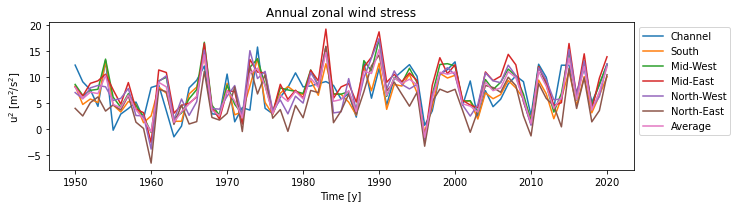

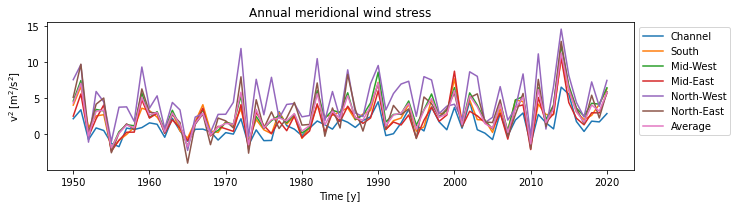

In [15]:
figs.plot_obs_wind_data(wind_data, model = model)

### Perform regression

In [26]:
results, timeseries = regres.regression_obs(wind_data, tg_data, wind_model = model, data_type = data_type)

In [27]:
results

,R$^2$,R$^2_{wind}$,R$^2_{u^2}$,R$^2_{v^2}$,RMSE,constant,Channel u$^2$,Channel v$^2$,South u$^2$,South v$^2$,...,Mid-West v$^2$,Mid-East u$^2$,Mid-East v$^2$,North-West u$^2$,North-West v$^2$,North-East u$^2$,North-East v$^2$,Average u$^2$,Average v$^2$,trend
station,,,,,,,,,,,,,,,,,,,,,
Vlissingen,0.833597,0.267419,0.231208,0.002058,1.995794,7.422482,1.256417,-0.902247,-0.000000,2.364191,...,-2.659276,0.0,0.000000,0.033463,0.348544,-0.242413,-1.908841,0.826607,0.0,3.766427
Hoek v. Holland,0.902244,0.246220,0.006025,0.283084,2.031207,10.093908,1.070951,1.149215,0.000000,0.796524,...,-0.000000,0.0,0.426487,-1.168593,1.557052,-0.554752,-1.878137,0.576388,-0.0,5.368865
Den Helder,0.848775,0.460203,0.001126,0.449460,1.978769,6.428044,0.845017,0.832763,0.000000,1.958413,...,-1.497016,0.0,0.280792,-1.191558,3.277631,-0.434551,-2.694947,-0.072412,-0.0,3.265791
Delfzijl,0.852867,0.359910,0.359529,0.091141,2.456397,7.704431,0.565601,0.276602,0.000000,1.666902,...,-1.867387,0.0,0.329941,1.016557,0.000000,-0.221231,-0.492701,-1.332490,-0.0,4.621529
Harlingen,0.819165,0.509923,0.476850,0.003472,2.296206,5.900621,1.034712,0.578112,-0.000000,0.981238,...,-2.360440,0.0,0.166793,1.083776,0.000000,-0.744925,-1.175821,-0.000000,-0.0,3.085410
IJmuiden,0.821119,0.375266,0.181799,0.201678,2.164448,7.245465,1.101249,0.000000,-0.960723,3.049157,...,-2.559727,0.0,0.587228,-0.000000,0.645969,-0.686589,-2.219229,0.976802,-0.0,3.518540
Average,0.883220,0.377992,0.334096,0.207528,1.839271,7.466248,1.045071,0.130702,0.000000,1.868930,...,-1.798749,0.0,0.280834,0.000000,0.861979,-0.386236,-1.600845,0.020851,0.0,3.929700


In [28]:
timeseries

Vlissingen                                                       \
     Channel u$^2$ Channel v$^2$ South u$^2$ South v$^2$ Mid-West u$^2$   
time                                                                      
1950      1.619018     -0.468571        -0.0   -0.116930      -0.134207   
1951      0.583296      0.506207         0.0   -1.051616      -0.505443   
1952      0.086492      0.216808         0.0    0.254288       0.150742   
1953     -0.938469      0.407984         0.0    0.517256       0.297848   
1954      1.911187     -1.810369        -0.0    1.205980       0.216530   
...            ...           ...         ...         ...            ...   
2016     -0.085162      0.569033         0.0   -1.130813      -0.339387   
2017      1.398742     -0.976723        -0.0    3.319256       1.785815   
2018     -0.681667      0.952777         0.0   -2.480420      -1.105484   
2019      0.384640      0.023000        -0.0    0.801616      -0.374023   
2020      1.687226     -0.967221        -0.0    3.012031       1.598385   

                                                                    \
     Mid-West v$^2$ Mid-East u$^2$ Mid-East v$^2$ North-West u$^2$   
time                                                                 
1950       0.781939            0.0            0.0         0.023470   
1951       1.739427           -0.0            0.0         0.062669   
1952       0.067836           -0.0           -0.0        -0.023916   
1953      -0.648924           -0.0           -0.0         0.000765   
1954       1.126474            0.0           -0.0         0.003211   
...             ...            ...            ...              ...   
2016       0.796407           -0.0            0.0         0.009019   
2017      -3.052634            0.0           -0.0        -0.007066   
2018       2.477127           -0.0            0.0         0.001854   
2019       1.059175            0.0            0.0         0.025341   
2020      -3.444922            0.0            0.0         0.057838   

                       ...    Average                                 \
     North-West v$^2$  ...      total wind total   Channel     South   
time                   ...                                             
1950         0.228046  ...  -5.678363   1.032877  1.414557 -0.092435   
1951         0.627858  ...  -7.163904  -0.644414  0.411847 -0.831319   
1952        -0.450782  ...  -4.199181   2.128560  0.040536  0.201018   
1953         0.063200  ...  -7.270093  -1.134102 -0.839708  0.408899   
1954         0.034522  ...  -2.473575   3.470666  1.851956  0.953347   
...               ...  ...        ...        ...       ...       ...   
2016         0.089105  ...   5.602516  -0.341725 -0.153268 -0.893926   
2017        -0.067257  ...  10.321062   4.185071  1.304946  2.623924   
2018         0.183075  ...   3.664063  -2.663678 -0.705024 -1.960812   
2019         0.167016  ...   8.634909   2.115419  0.316606  0.633691   
2020         0.486909  ...   9.108991   2.397750  1.543527  2.381059   

                                                                        
      Mid-West  Mid-East North-West North-East u$^2$ total v$^2$ total  
time                                                                    
1950  0.424340  0.158535   0.563977  -1.451211    1.169803   -0.152042  
1951  0.782739  0.373055   1.552746  -2.981003   -0.509210   -0.182726  
1952  0.163336 -0.341204  -1.114821   3.199445    0.609325    1.538985  
1953 -0.206866 -0.060746   0.156299  -0.600409   -0.556140   -0.586390  
1954  0.930664 -0.123081   0.085376  -0.242069    1.420066    2.036125  
...        ...       ...        ...        ...         ...         ...  
2016  0.274258  0.092020   0.220364   0.114560   -0.356978    0.010987  
2017 -0.673390 -0.145018  -0.166332   1.251425    2.689674    1.505881  
2018  0.814198  0.100697   0.452760  -1.382689   -1.580807   -1.100063  
2019  0.425009  0.082988   0.413044   0.249109   -0.121625    2.242072  
2020 -1.084774  0.

#### Plot regression results

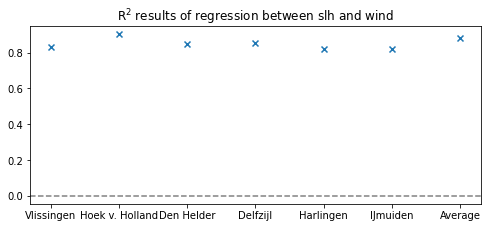

In [19]:
figs.plot_obs_result_per_station(results, 'R$^2$', model, data_type)

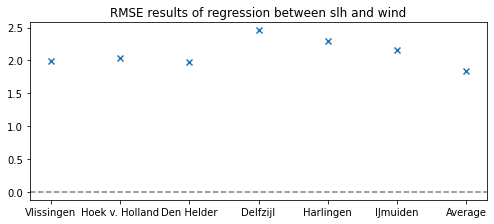

In [20]:
figs.plot_obs_result_per_station(results, 'RMSE', model, data_type)

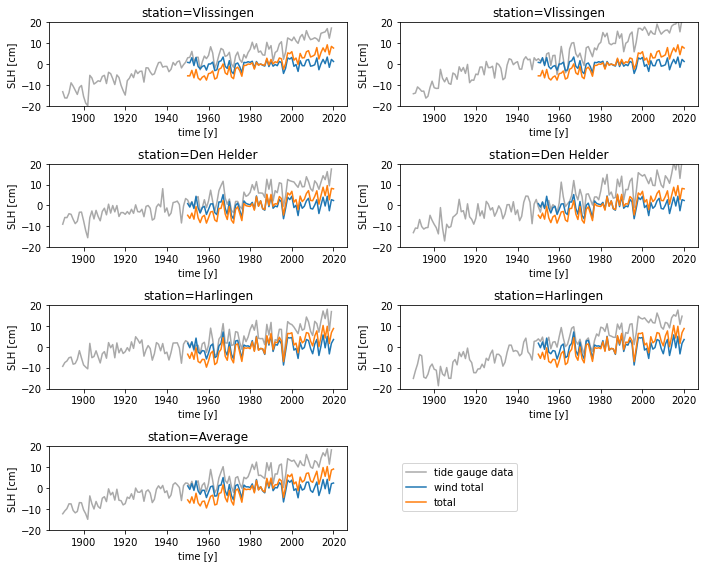

In [22]:
figs.plot_obs_timeseries_per_station(tg_data, timeseries, ['wind total', 'total'], model, data_type)

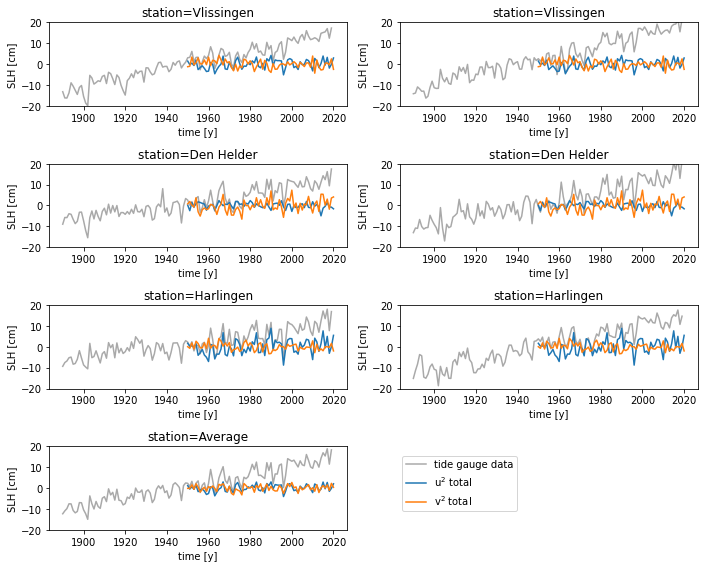

In [23]:
figs.plot_obs_timeseries_per_station(tg_data, timeseries, ['u$^2$ total', 'v$^2$ total'], model, data_type)

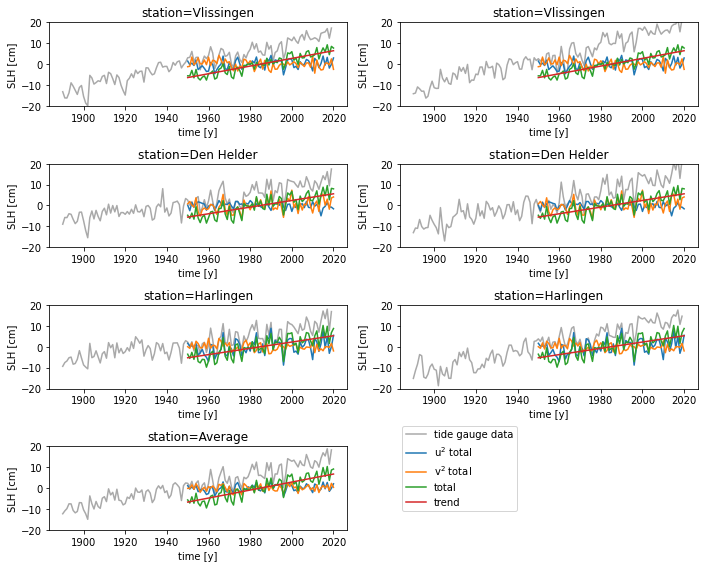

In [25]:
figs.plot_obs_timeseries_per_station(tg_data, timeseries, ['u$^2$ total', 'v$^2$ total', 'trend', 'total'], model, data_type)

#### Plot trends

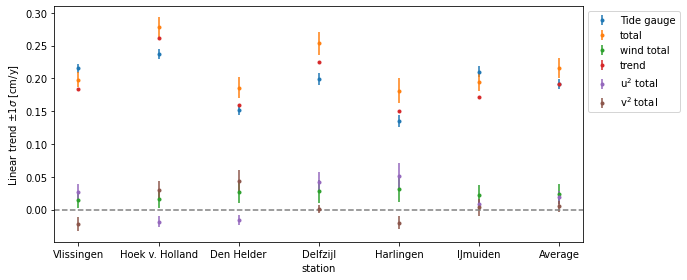

In [29]:
figs.plot_obs_trends_timeseries_per_station(tg_data, timeseries, ['total', 'wind total', 'trend', 'u$^2$ total', 'v$^2$ total'], model, data_type)

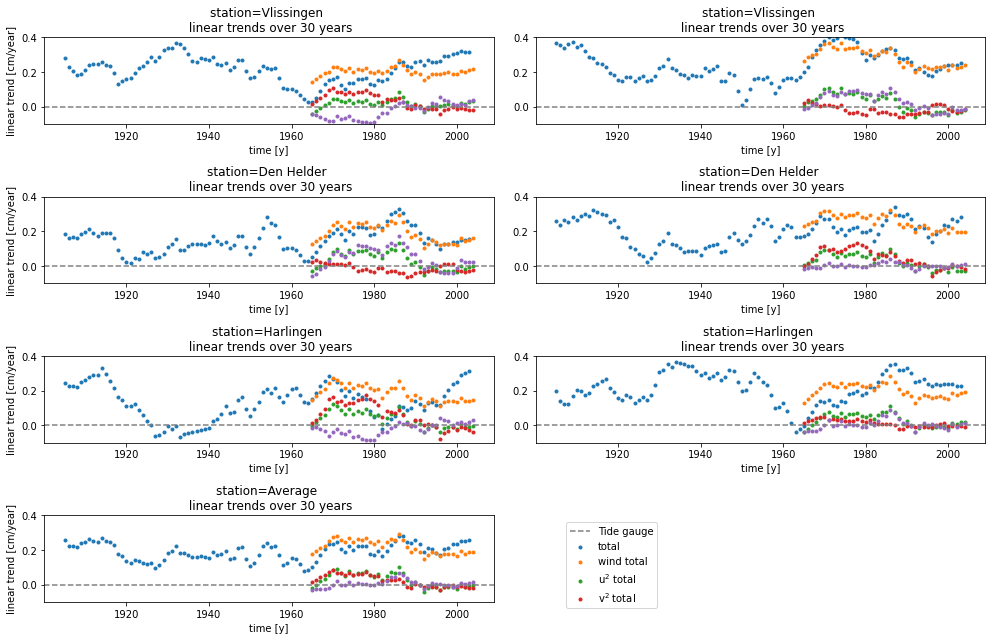

In [32]:
figs.plot_obs_decadal_trends_timeseries_per_station(tg_data, timeseries, ['total', 'wind total', 'u$^2$ total', 'v$^2$ total'], 30, model, data_type, errorbar = False)